* Name: **Catherine DeJager**
* Collaborators: **Professor Arnold (answered a question I had)**


# Lab 3: What makes a good prediction?

Adapted with permission from Berkeley DATA100 Summer19 Lab7

Predictive modeling is central to data-driven decision-making. The goal of this lab is to introduce some of the basic concepts of predictive modeling through the lens of the guiding question, "What makes a good prediction?" (We will be considering that question purely numerically at this point; we will address that question more broadly soon.)

This lab will also introduce you to the idea of transforming numerical data using "broadcast" operations. These powerful tools enable you to perform mathematical operations on large amounts of data with just a single (and usually simple) expression.

In this lab you will:
1. transform df columns
1. define and compare loss functions
1. measure overall prediction error using MSE and R2.

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** at the top of this notebook.

## Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Loading the Tips Dataset

To begin with, we load the tips dataset from the `seaborn` library.  The tips data contains records of tips, total bill, and information about the person who paid the bill.

In [2]:
data = sns.load_dataset("tips")

print("Number of Records:", len(data))
data.head()

Number of Records: 244


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

## Question 1: Transforming Data (and broadcast operations)
Let's create a new column named '%' to reflect what percent of the total bill.

In [3]:
data['%'] = data['tip'] / data['total_bill'] * 100

In [4]:
assert data['%'].between(0, 100).mean() == 1

Make a simple visualization to convince yourself that your new column is correct.

//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of tip percentage')

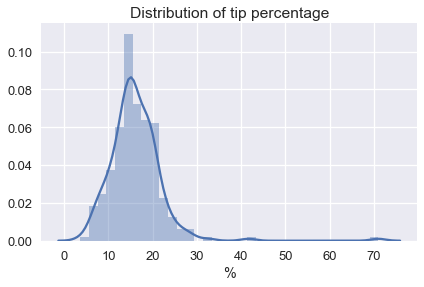

In [5]:
sns.distplot(data['%'])
plt.title("Distribution of tip percentage")

Get some summary statistics to additionally convince yourself that your new `%` column is correct.

In [6]:
print("mean:", data['%'].mean(), "median:", data['%'].median(), "min:", data['%'].min(),
      "max:", data['%'].max())

mean: 16.080258172250463 median: 15.476977125802577 min: 3.563813585135547 max: 71.0344827586207


---
<br/><br/><br/>

# Loss Functions

Let's try to predict the tip percentage!

Suppose I predict that everyone tips 15%. Is that a *good* prediction? How could I measure that?

Loss functions quantify how much "off" a prediction is.  In this lab we will implement the squared loss and the absolute loss functions.  

Suppose we predict that everyone will tip $\hat{y}$=15 percent. Now we observe a tip $y$. To quantify how far off $\hat{y}$ is, we might use one of the following **loss functions**

1. **Squared Loss** (also known as the $L^2$ loss pronounced "ell-two"):
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, \hat{\hspace{0pt}y} \right) = \left( y - \hat{\hspace{0pt}y} \right)^2
$$
1. **Absolute Loss** (also known as the $L^1$ loss pronounced "ell-one"):
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, \hat{\hspace{0pt}y} \right) = \left| y - \hat{\hspace{0pt}y} \right|
$$

---
<br></br>
In this question, you are going to define functions for **squared loss** and **absolute loss**. 

## Question 2a: Implement the squared loss function


$$\Large
L\left(y, \hat{\hspace{0pt}y} \right) = \left( y - \hat{\hspace{0pt}y} \right)^2
$$

Using the comments below, implement the squared loss function. Your answer should not use any loops.

<!--
BEGIN QUESTION
name: q2a
-->

In [7]:
def squared_loss(y_obs, y_hat):
    """
    Calculate the squared loss of the observed data and predicted data.
    
    Parameters
    ------------
    y_obs: an array of observed values
    y_hat: an array of predicted values
    
    Returns
    ------------
    An array of loss values corresponding to the squared loss for each prediction
    """
    return np.power(y_obs - y_hat, 2)

In [8]:
assert squared_loss(5., 5.) == 0.
assert squared_loss(5., 7.) == 4.
assert np.allclose(squared_loss(np.array([5., 7.]), np.array([5., 7.])), np.array([0.0, 0.0]))
assert np.allclose(squared_loss(np.array([5., 7.]), np.array([5., 5.])), np.array([0.0, 4.0]))

## Question 2b: Plotting Squared Loss

Suppose you observe a bill of \\$10 with a tip \\$1.50, so the tip was $y$=15 percent.

Now suppose we pick a range of $\hat{y}$'s (average-for-everyone tip percents) for you. Use the `squared_loss` function defined above to plot the loss for a range of values:

In [9]:
y_obs = 15.
yhats = np.linspace(0, 50, 200) # A range of possible values to predict

## Finish this by replacing 0.0 with the correct calculation 
## Hint: You will use squared_loss, y_obs, and y_hat
#loss should be a numpy array where the ith entry corresponds to the loss for the ith theta
loss = np.array([ squared_loss(y_obs, y_hat) for y_hat in yhats])


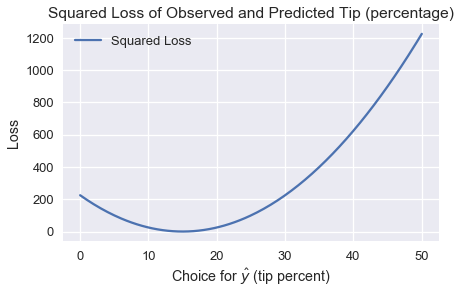

In [10]:
plt.plot(yhats, loss, label="Squared Loss")
plt.title("Squared Loss of Observed and Predicted Tip (percentage)")
plt.xlabel(r"Choice for $\hat{y}$ (tip percent)")
plt.ylabel(r"Loss")
plt.legend(loc='best')
plt.savefig("squared_loss_my_plot.png",  bbox_inches = 'tight')

## Question 2c: Implement the absolute loss 

$$\Large
L\left(y, \hat{\hspace{0pt}y} \right) = \left| y - \hat{\hspace{0pt}y} \right|
$$

<!--
BEGIN QUESTION
name: q2c
-->

In [11]:
def abs_loss(y_obs, y_hat):
    """
    Calculate the absolute loss of the observed data and predicted data.
    
    Parameters
    ------------
    y_obs: an array of observed values
    y_hat: an array of predicted values
    
    Returns
    ------------
    An array of loss values corresponding to the absolute loss for each prediction
    """
    return np.absolute(y_obs - y_hat)

In [12]:
assert np.allclose(abs_loss(np.array([5., 7.]), np.array([5., 7.])), np.array([0.0, 0.0]))
assert np.allclose(abs_loss(np.array([5., 7.]), np.array([5., 5.])), np.array([0.0, 2.0]))

## 2c: Plot the absolute loss.
Make the same plot as above, but now for the absolute loss.

In [13]:
y_obs = 15.
yhats = np.linspace(0, 50, 200)  # a range of possible values to predict
loss = np.array([abs_loss(y_obs, y_hat) for y_hat in yhats])

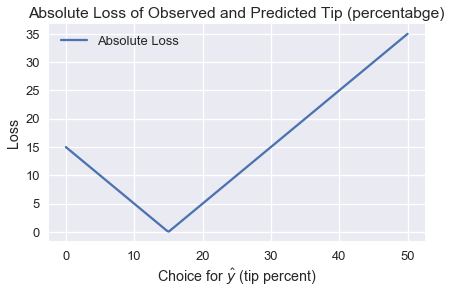

In [14]:
plt.plot(yhats, loss, label="Absolute Loss")
plt.title("Absolute Loss of Observed and Predicted Tip (percentabge)")
plt.xlabel(r"Choice for $\hat{y}$ (tip percent)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.savefig("absolute_loss_my_plot.png",  bbox_inches = "tight")



## Question 2d: Plotting **Average Loss** for our Data

Now, we can extend the above loss functions to an entire dataset by taking the average. Let the dataset $\mathcal{D}$ be the set of observations:

$$\Large
\mathcal{D} = \{(x_1, y_1), \ldots, (x_n, y_n)\}
$$

where $x_i$ is the data we have about the restaurant visit (we're ignoring it right now) and $y_i$ is the tip percentage.

We can define the average loss over the dataset as:

$$\Large
L\left(\hat{y}, \mathcal{D}\right) = \frac{1}{n} \sum_{i=1}^n L(\hat{y}, y_i)
$$

**Complete the following code block to render a plot of the average absolute and squared loss for different values of $\hat{y}$**

In [15]:
yhats = np.linspace(0, 50, 200) # A range of possible values to predict
y_obs = data['%']

# Replace 0.0 with the correct value computed 
# Use the loss functions from above

# This time, each loss array should be a numpy array where the ith entry corresponds to the 
# average loss across all data points for the ith yhat
avg_squared_loss = np.array([np.mean(squared_loss(y_obs, y_hat)) for y_hat in yhats])
avg_absolute_loss = np.array([np.mean(abs_loss(y_obs, y_hat)) for y_hat in yhats])


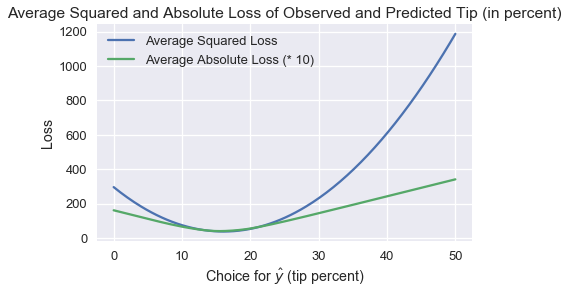

In [16]:
plt.plot(yhats, avg_squared_loss, label = "Average Squared Loss")
plt.plot(yhats, avg_absolute_loss * 10, label = "Average Absolute Loss (* 10)")
plt.title("Average Squared and Absolute Loss of Observed and Predicted Tip (in percent)")
plt.xlabel(r"Choice for $\hat{y}$ (tip percent)")
plt.ylabel(r"Loss")
plt.legend()
plt.savefig("average_loss_my_plot.png",  bbox_inches = 'tight')

**Based on the plot above, approximately what is the optimal value of theta you would choose for this model?**

**18**

## How to minimize that loss?

What is the average loss you get for each of the following tip percentages (fill in the table)

guess | mean squared error | mean absolute error
-----|---|---
15 | 38.312238 | 3.991214
4 | 183.077918 | 12.083833
`data['%'].mean()` | 37.145280 | 4.000907
`data['%'].mean() + .005` | 37.145305 | 4.001522
`data['%'].mean() - .005` | 37.145305 | 4.000293
`data['%'].median()` | 37.509228 | 3.963595
`data['%'].median() + .005` | 37.503220 | 3.963595
`data['%'].median() - .005` | 37.515286 | 3.963595


In [17]:
guesses = [
    15., 4.,
    data['%'].mean(), data['%'].mean() + .005, data['%'].mean() - .005,
    data['%'].median(), data['%'].median() + .005, data['%'].median() - .005
]
pd.DataFrame({
    "guess": guesses, 
    "MSE": [np.mean(squared_loss(guess, y_obs)) for guess in guesses],
    "MAE": [np.mean(abs_loss(guess, y_obs)) for guess in guesses],
})

guess         MSE        MAE
0  15.000000   38.312238   3.991214
1   4.000000  183.077918  12.083833
2  16.080258   37.145280   4.000907
3  16.085258   37.145305   4.001522
4  16.075258   37.145305   4.000293
5  15.476977   37.509228   3.963595
6  15.481977   37.503220   3.963595
7  15.471977   37.515286   3.963595

Based on your observations, what guess minimizes the MSE? the MAE?

**Using the mean of the data minimizes the MSE. Using the median of the data minimizes the MAE.**

The MSE of predicting the mean has another name -- probably one that is very familiar to you. It even has a built-in function in NumPy. Can you figure out what it is?

**Would that be variance? The standard deviation is a measure of how far away observations are from the mean, and variance is the square of standard deviation. If it is variance, then the function is np.var**

## Using a model to make predictions

Our predictive model was too simple: we assumed that everyone would leave the same tip. But we might be able to make a better guess by taking into account some characteristics. Look at the data (repeated again below) -- there are several columns that might plausibly help us make that prediction. Maybe men and women tip different amounts? Maybe people tip more or less on certain days of the week? Maybe larger parties tip more--or less? Maybe people tip more for fancier meals (reflected in the total bill)?

## Q: Predict using sex

Fill in the template below to try to predict the tip amount given the bill-payer's sex.

In [18]:
tip_amounts_by_sex = {
    "Male": 15.,
    "Female": 18.
}

def predict_pct_from_sexes(sexes, tip_amounts_by_sex):
    return np.array([tip_amounts_by_sex[sex] for sex in sexes])

sexes = data['sex']
yhats = predict_pct_from_sexes(sexes, tip_amounts_by_sex)
mse = np.mean(squared_loss(y_obs, yhats))
print("Error: ", mse)

Error:  37.99331791107281


2. How could we do it in a more principled way?

In [19]:
data['%'][data['sex'] == "Male"].mean()

15.765054700429744

In [20]:
data.groupby('sex')['%'].mean()

sex
Male      15.765055
Female    16.649074
Name: %, dtype: float64

In [21]:
data['%'].groupby(data['sex']).mean()

sex
Male      15.765055
Female    16.649074
Name: %, dtype: float64

Use the predict_pct_from_sexes function defined above to evaluate the MSE using gender

In [22]:
tip_amounts_by_sex_mean = {
    "Male": data['%'][data['sex'] == "Male"].mean(),
    "Female": data['%'][data['sex'] == "Female"].mean()
}
sexes = data['sex']
yhats = predict_pct_from_sexes(sexes, tip_amounts_by_sex)
mse = np.mean(squared_loss(y_obs, yhats))
print("Error: ", mse)

Error:  37.99331791107281


## How good of a prediction can we make by using the sex information?

Compute the MSE of our new prediction.

## Compare that error with the error we got when predicting the mean.

Complete the following:

In [26]:
tip_amounts_by_sex = {
    "Male": 15.,
    "Female": 18.
}

mse_predicting_mean = np.mean(squared_loss(y_obs, predict_pct_from_sexes(sexes, tip_amounts_by_sex)))
mse_using_gender = np.mean(squared_loss(y_obs, predict_pct_from_sexes(sexes, tip_amounts_by_sex_mean)))
r2 = 1 - mse_using_gender / mse_predicting_mean
print('MSE predicting mean: {:.3f}, MSE using gender: {:.3f}, R^2: {:.3f}'.format(
    mse_predicting_mean,
    mse_using_gender,
    r2
))

MSE predicting mean: 37.993, MSE using gender: 36.966, R^2: 0.027


R^2 makes a relative comparison between the prediction errors. Have you seen it before in other contexts?

**I've seen it in terms of comparing linear models in statistics classes.**

### Question:
What is the maximum value that $R^2$ might take?

**1**

### Question:
What is the minimum value that $R^2$ might take?

**0**

### Question
What value of $R^2$ would be considered the "best" prediction?

**1**